In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'dgcnn_double': {
        'train': {
            'l1': pd.read_csv('logs_csv/run-askar-train-l1.csv')
        },
        'val': {
            'l1': pd.read_csv('logs_csv/run-askar-val-l1.csv'),
            'chamfer': pd.read_csv('logs_csv/run-askar-val-chamfer.csv')
        }
    },
    'dgcnn_single': {
        'train': {
            'l1': pd.read_csv('logs_csv/run-gozde-train-l1.csv'),
            'chamfer': pd.read_csv('logs_csv/run-gozde-train-chamfer.csv')
        },
        'val': {
            'l1': pd.read_csv('logs_csv/run-gozde-val-l1.csv'),
            'chamfer': pd.read_csv('logs_csv/run-gozde-val-chamfer.csv')
        }
    },
    'mesh_gnn': {
        'train': {
            'l1': pd.read_csv('logs_csv/run-mesh-gnn-train-l1.csv')
        },
        'val': {
            'l1': pd.read_csv('logs_csv/run-mesh-gnn-val-l1.csv'),
            'chamfer': pd.read_csv('logs_csv/run-mesh-gnn-val-chamfer.csv')
        }
    }
}

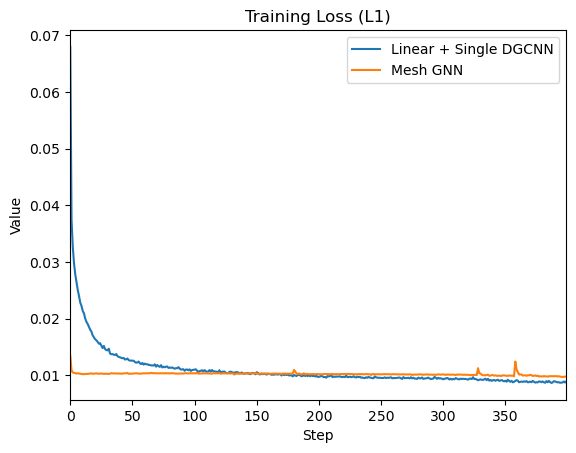

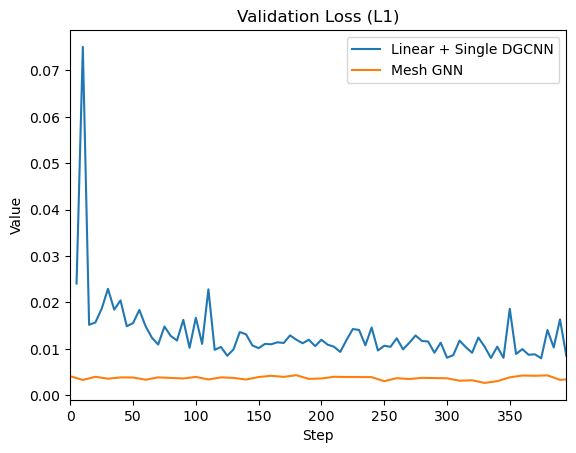

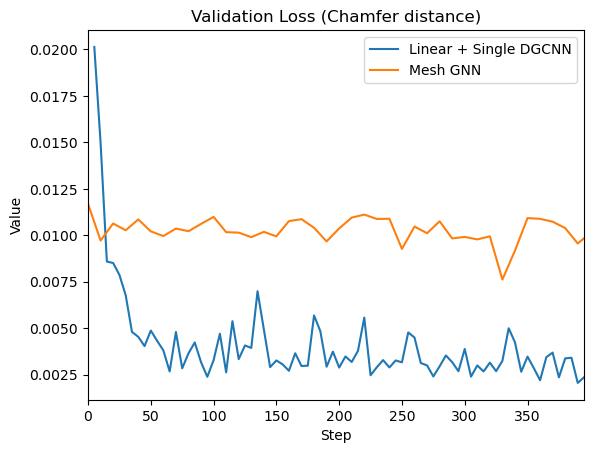

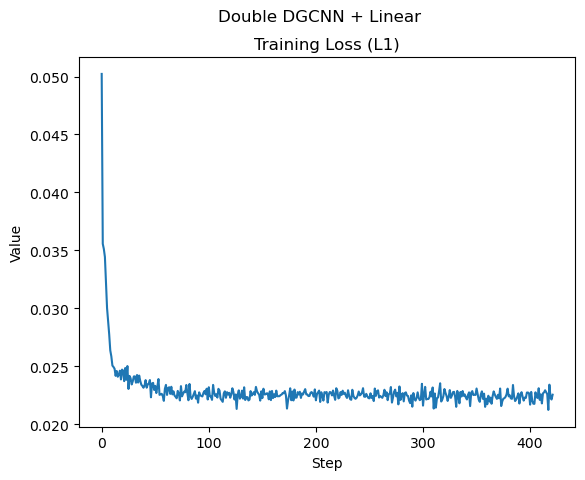

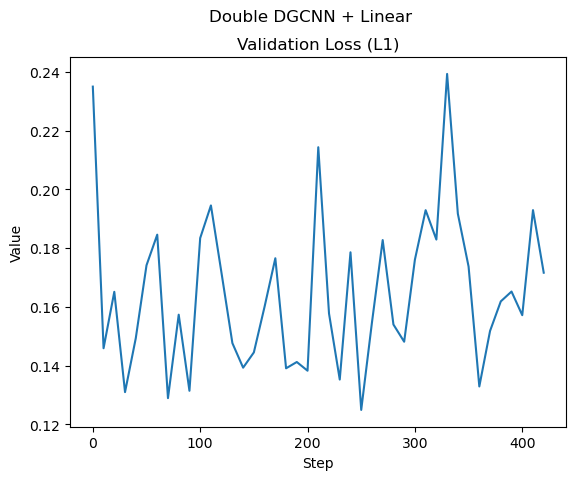

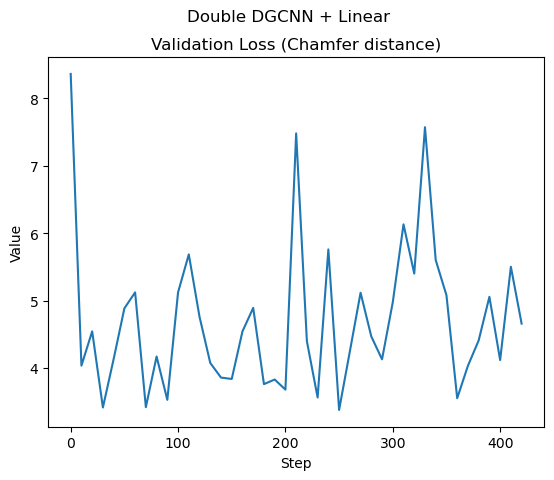

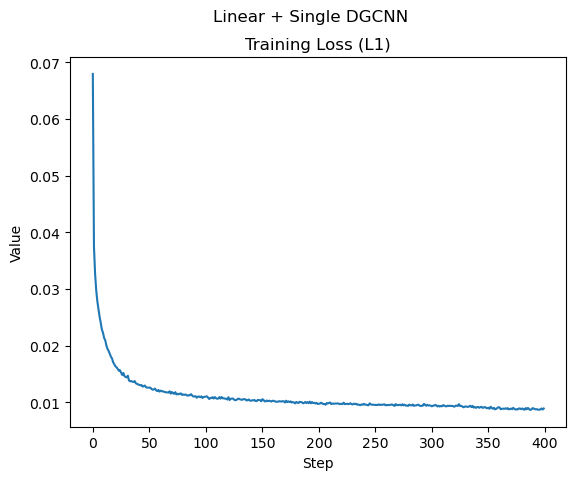

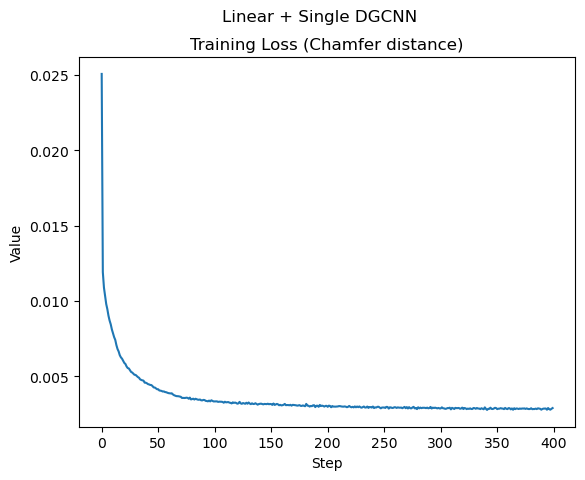

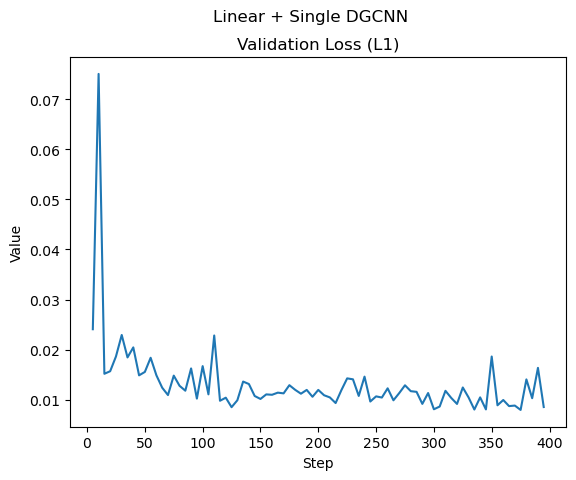

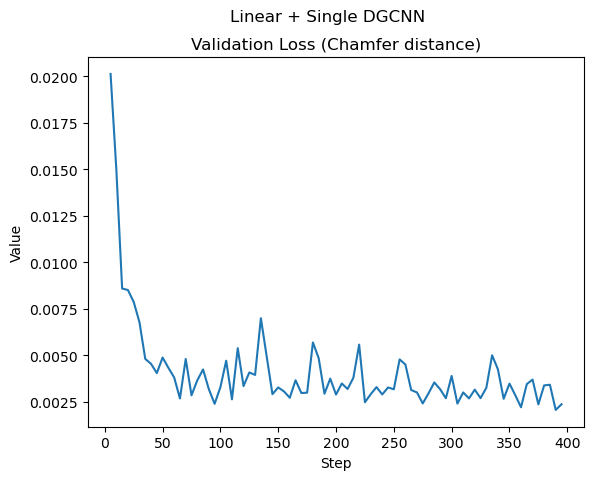

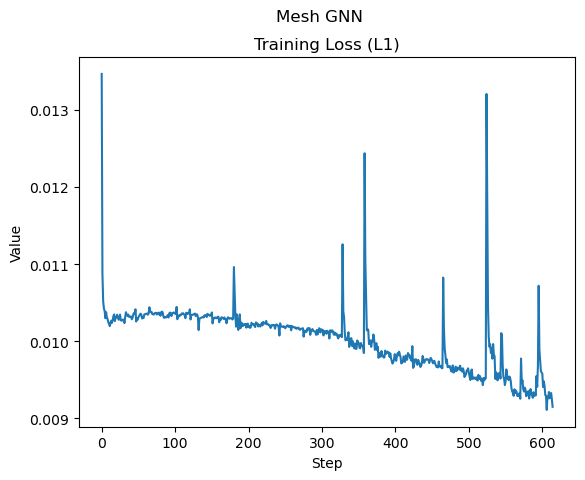

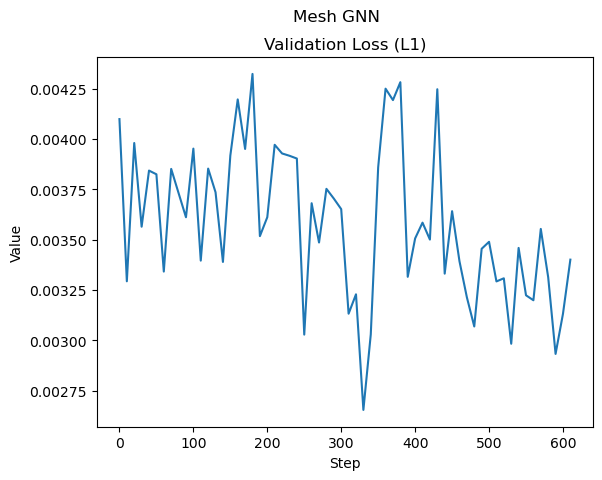

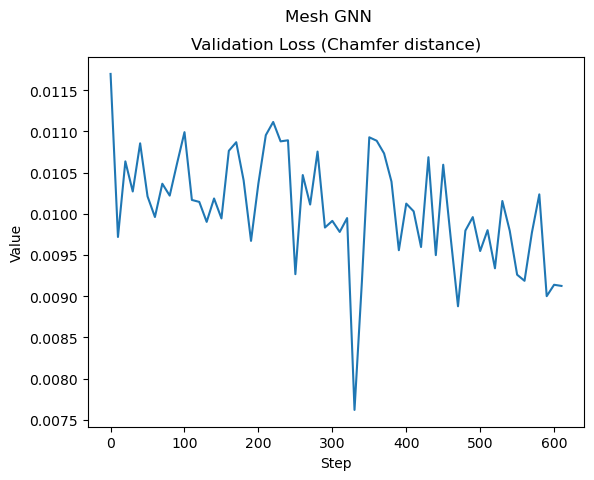

In [4]:
titles = {
    'val': 'Validation Loss',
    'train': 'Training Loss'
}
labels = {
    'dgcnn_double': 'Double DGCNN + Linear',
    'dgcnn_single': 'Linear + Single DGCNN',
    'mesh_gnn': 'Mesh GNN'
}
losses = {
    'l1': 'L1',
    'chamfer': 'Chamfer distance'
}
def plot(model: str, split: str, loss: str):
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(f'{titles[split]} ({losses[loss]})')
    if model == 'all':
        # csv_1 = data['dgcnn_double'][split][loss]
        csv_2 = data['dgcnn_single'][split][loss]
        csv_3 = data['mesh_gnn'][split][loss]
        plt.xlim(0, min(
            # csv_1.Step.iloc[-1], 
            csv_2.Step.iloc[-1],
            csv_3.Step.iloc[-1],
            ))
        # plt.plot(csv_1.Step, csv_1.Value, label=labels['dgcnn_double'])
        plt.plot(csv_2.Step, csv_2.Value, label=labels['dgcnn_single'])
        plt.plot(csv_3.Step, csv_3.Value, label=labels['mesh_gnn'])
        plt.legend()
    else:
        plt.suptitle(labels[model])
        csv = data[model][split][loss]
        plt.plot(csv.Step, csv.Value)
    plt.savefig(f'plots/{split}_{model}_{loss}.png')
    plt.show()

plot('all', 'train', 'l1')
plot('all', 'val', 'l1')
plot('all', 'val', 'chamfer')
for model, model_data in data.items():
    for split, split_data in model_data.items():
        for loss in split_data.keys():
            plot(model, split, loss)

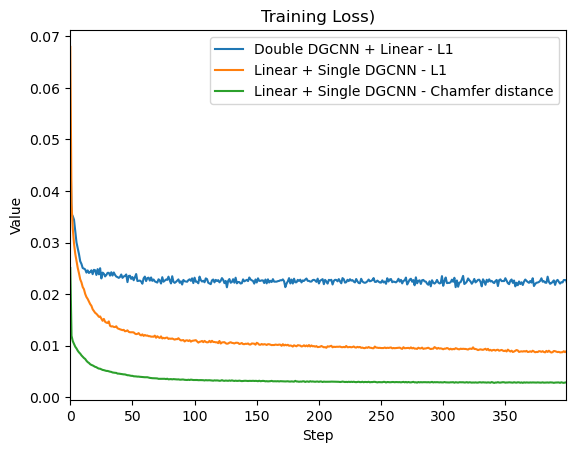

In [13]:
plt.xlabel('Step')
plt.ylabel('Value')
plt.title(f'{titles["train"]})')
csv_1 = data['askar']['train']['l1']
csv_2 = data['gozde']['train']['l1']
csv_3 = data['gozde']['train']['chamfer']
plt.xlim(0, min(csv_1.Step.iloc[-1], csv_2.Step.iloc[-1]))
plt.plot(csv_1.Step, csv_1.Value, label=f'{labels["askar"]} - {losses["l1"]}')
plt.plot(csv_2.Step, csv_2.Value, label=f'{labels["gozde"]} - {losses["l1"]}')
plt.plot(csv_3.Step, csv_3.Value, label=f'{labels["gozde"]} - {losses["chamfer"]}')
plt.legend()
plt.savefig(f'plots/triple_train.png')
plt.show()